In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


in tnis data we have categorical and contious both columns present and 32560 rows and 15 columns in which 1 is target like income and other are independent variables and there is two categories present in target so that we observe that this
classification problem and treat with supervised ml model classifier

In [55]:
prsize of dataset',df.shape)int('

size of dataset (32560, 14)


In [3]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [3]:
#checking categerical columns\
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]== "object":
        categorical_col.append(i)
print('categorical columns:',categorical_col)
print('\n')


#checking numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print('numerical columns:',numerical_col)

categorical columns: ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


numerical columns: ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


In [18]:
#checkingthe uniqe value in each columns
for i in df.columns:
    print(df[i].unique(),df[i].dtypes)
    print(df[i].nunique(),'\n')

[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] int64
73 

[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] object
9 

[ 83311 215646 234721 ...  34066  84661 257302] int64
21647 

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] object
16 

[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] int64
16 

[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed'] object
7 

[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op

In [4]:
# we see lots of catagoriespresent i native country column so we remove this for better performance
df.drop('Native_country',axis=1,inplace=True)

In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Income'],
      dtype='object')

In [6]:
df['Workclass']=df['Workclass'].str.replace("?"," ")
df['Workclass'].unique()


array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', '  ', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [7]:
df['Occupation']=df['Occupation'].str.replace('?'," ")
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', '  ', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [8]:
df.loc[df['Workclass']==' ']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income


In [9]:
df['Workclass']=df['Workclass'].replace(' ',np.nan)
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
                      1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [10]:
df['Occupation']= df['Occupation'].replace(' ',np.nan)

In [11]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Income            0
dtype: int64

no missing or null values present in data so we proceed with this dataset

In [12]:
# to  conver our target values tonumerical form
df['Income']= df['Income'].map({' <=50K':1,' >50K':0})

In [13]:
df['Income'].unique()

array([1, 0], dtype=int64)

In [19]:
#checking the statistics of data
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469,0.759183
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618,0.427586
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000,1.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000,1.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000,1.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


in thhis we see no nan value present so nice to proceed

there are somecolumns in which standard deviationd more than mean hence possibliyyto outlier present we also check skewness of data and all other values is well manner the mean value is greater than 50 percentile hence no issue to create in dataset and also meen is lower than std deviation hence possibility ofoutlierpresent
more difference is make over in max and min value insome columns so we checkfor outlier

1    24719
0     7841
Name: Income, dtype: int64


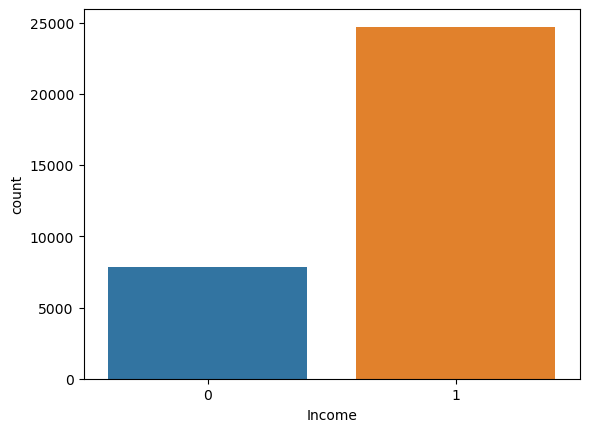

In [21]:
# data visualization
ax=sns.countplot(x='Income',data=df)
print(df['Income'].value_counts())

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64


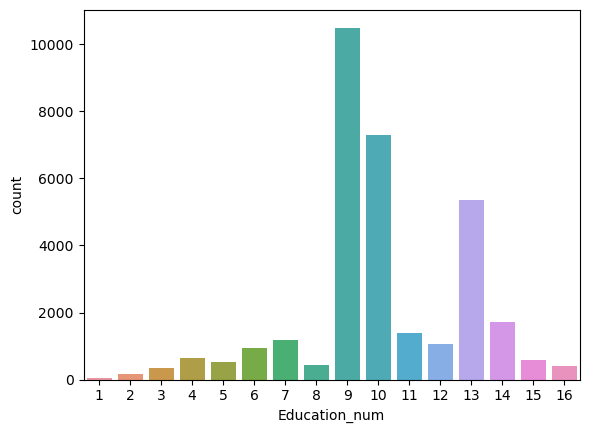

In [34]:
ax=sns.countplot(x='Education_num',data=df)
print(df['Education_num'].value_counts())

we see that dtaset contain less than 50% value occerss in one categories in target so this willhandle with imbalance data

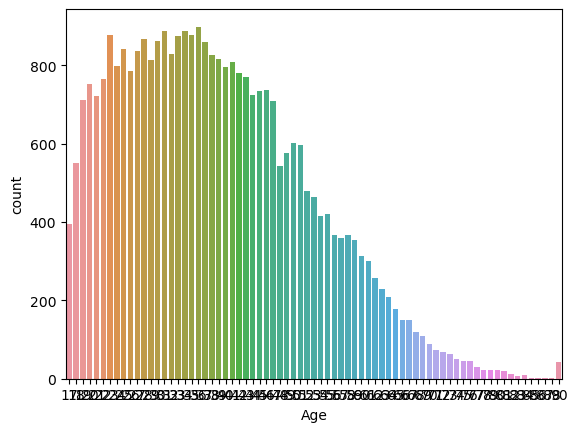

In [23]:
# lets checkinsg with counting of age ingiven data
ax= sns.countplot(x='Age',data=df)
plt.show()

In [24]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


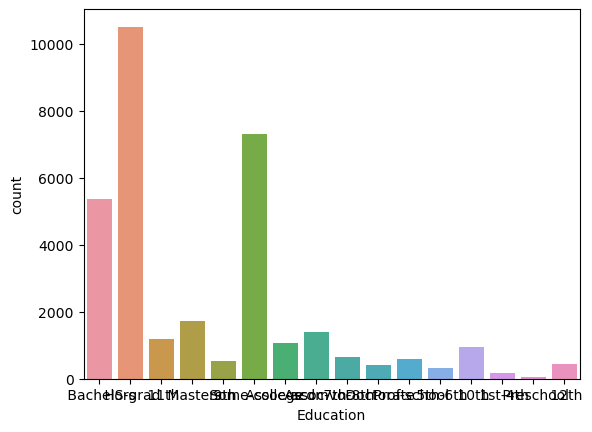

In [26]:
ax=sns.countplot(x='Education',data=df)
print(df['Education'].value_counts())

 Male      21789
 Female    10771
Name: Sex, dtype: int64


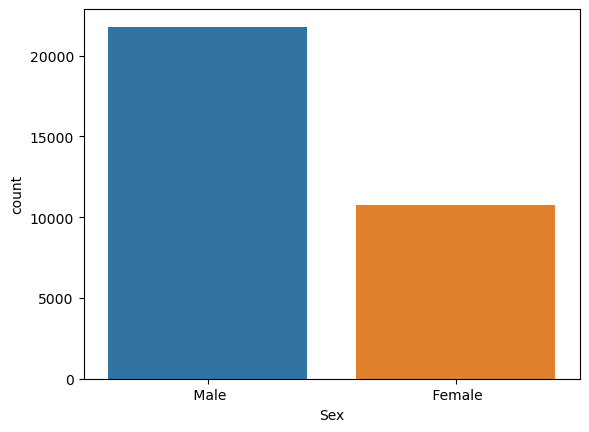

In [27]:
ax=sns.countplot(x='Sex',data=df)
print(df['Sex'].value_counts())

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


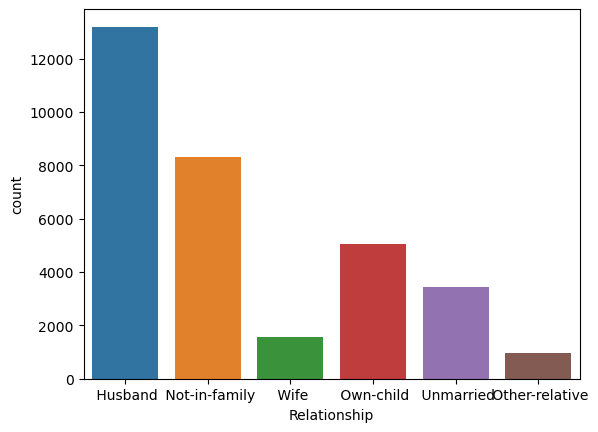

In [28]:
ax=sns.countplot(x='Relationship',data=df)
print(df['Relationship'].value_counts())

<Figure size 800x600 with 0 Axes>

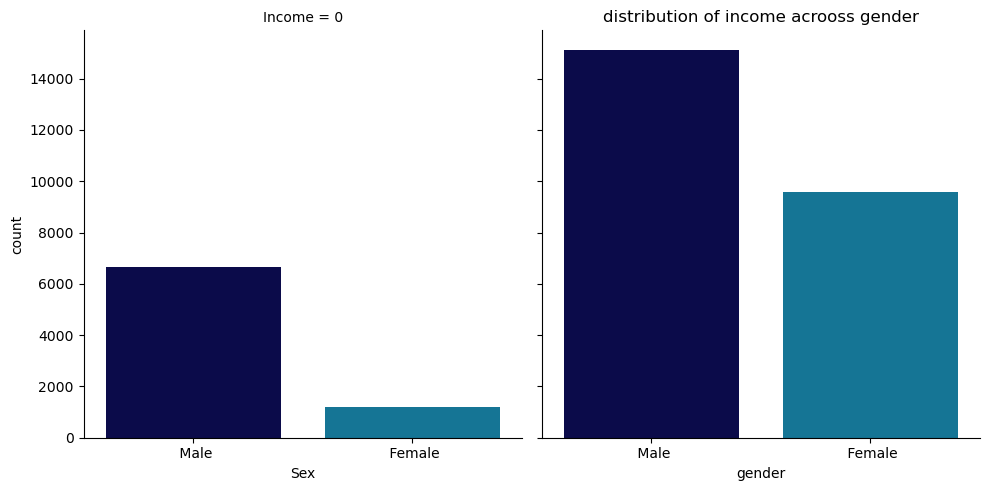

In [32]:
plt.figure(figsize=(8,6))
ax=sns.catplot(x='Sex',col='Income',data=df,kind='count',palette='ocean')
plt.xlabel('gender')
plt.ylabel('no of people')
plt.title('distribution of income acrooss gender')
plt.show()

In [ ]:
plt.figure(figsize=())

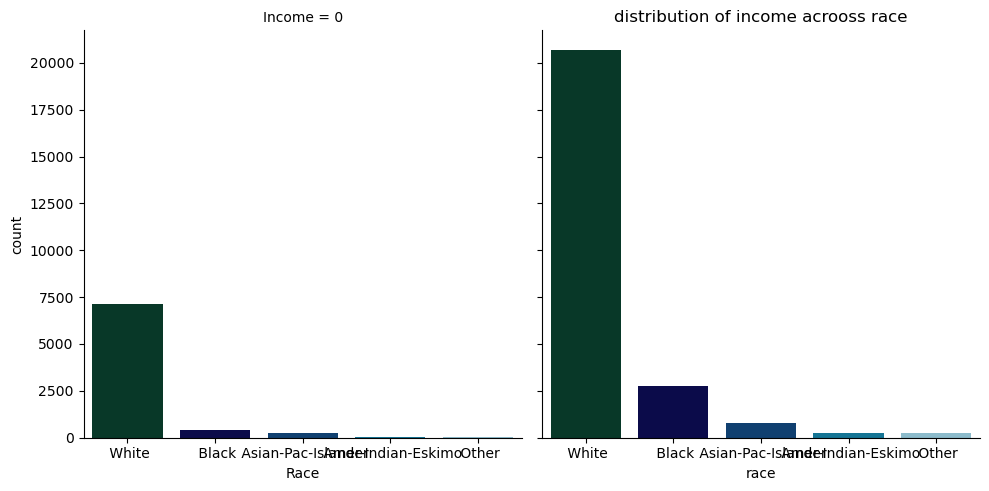

In [33]:
ax=sns.catplot(x='Race',col='Income',data=df,kind='count',palette='ocean')
plt.xlabel('race')
plt.ylabel('no of people')
plt.title('distribution of income acrooss race')
plt.show()

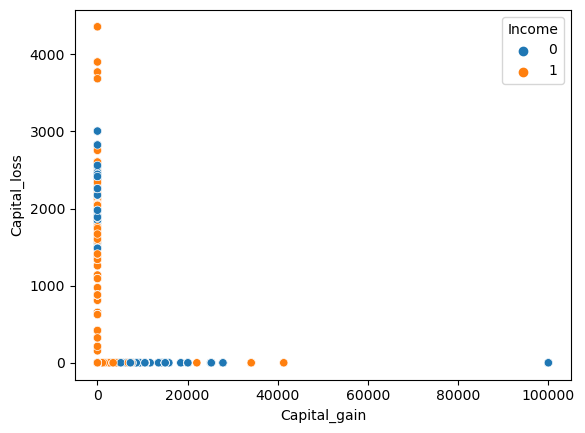

In [44]:
# lets compare two columns to the target variable for finding relation
sns.scatterplot(x='Capital_gain',y='Capital_loss',hue='Income',data=df)
plt.show()

we see that lot of people which income is less 50k have lowcounting in graph ang white race have high percentage in income 

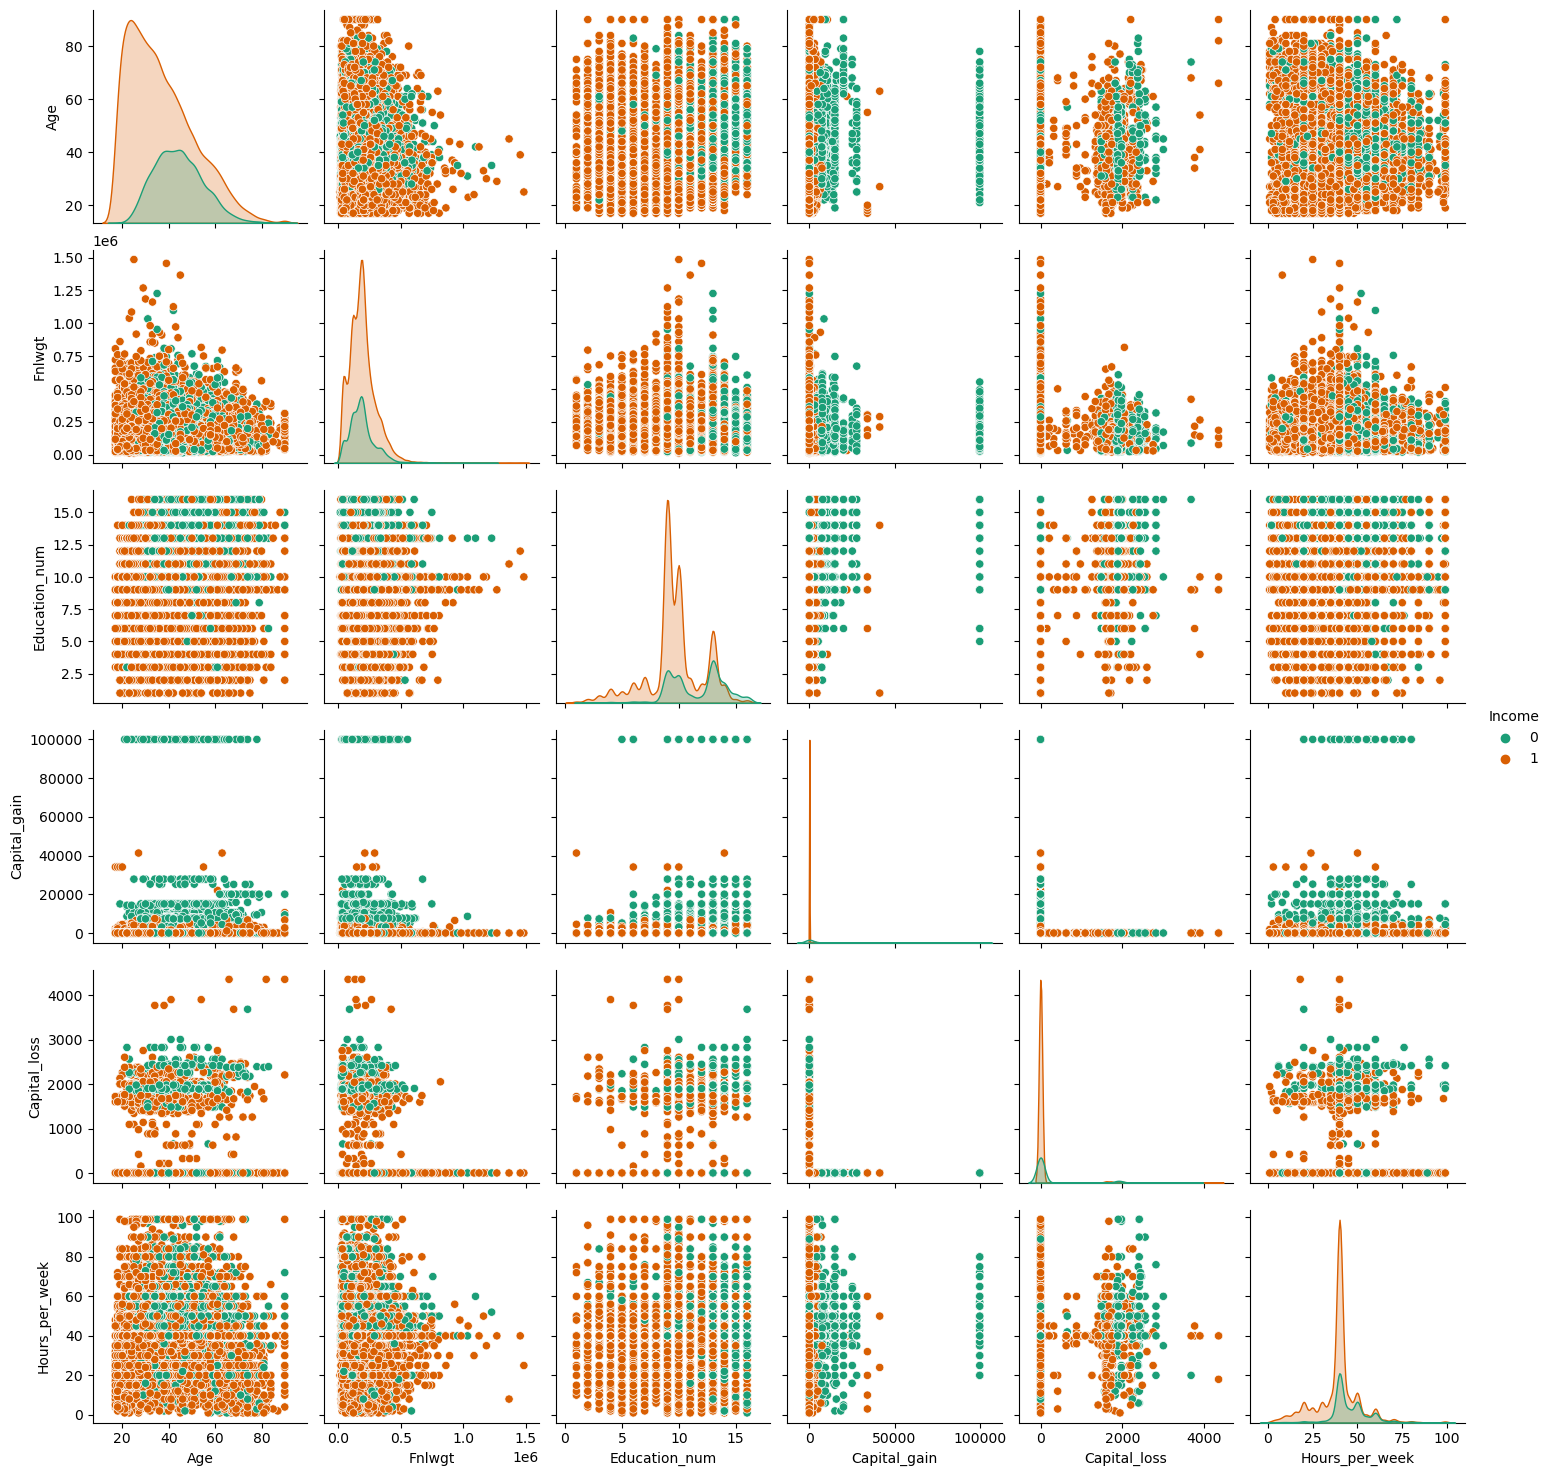

In [38]:
#multivariate analysis
sns.pairplot(df, hue='Income', palette= 'Dark2')
plt.show()

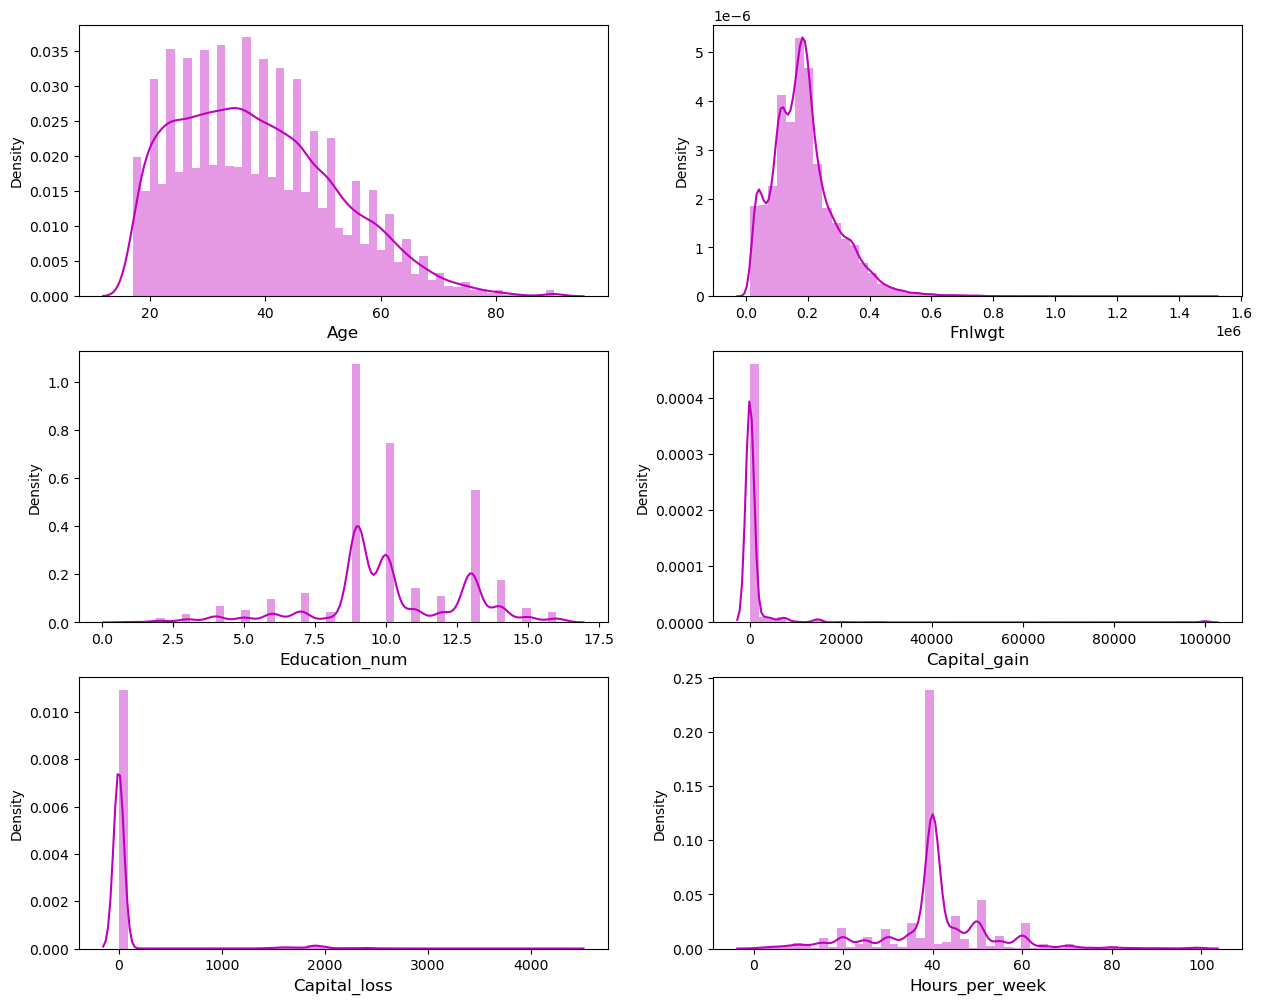

In [41]:
#lets check howthe data has been distributed in remaining coloumns
plt.figure(figsize=(15,12), facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df[col],color='m')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show()

In [14]:
#lets check skewness of dta
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Income            -1.212383
dtype: float64

In [15]:
c
df['Capital_gain']= np.cbrt(df['Capital_gain'])
df['Capital_loss']= np.cbrt(df['Capital_loss'])


In [16]:
df.skew()

Age               0.558738
Fnlwgt           -0.164177
Education_num    -0.311630
Capital_gain      4.100150
Capital_loss      4.336999
Hours_per_week    0.227636
Income           -1.212383
dtype: float64

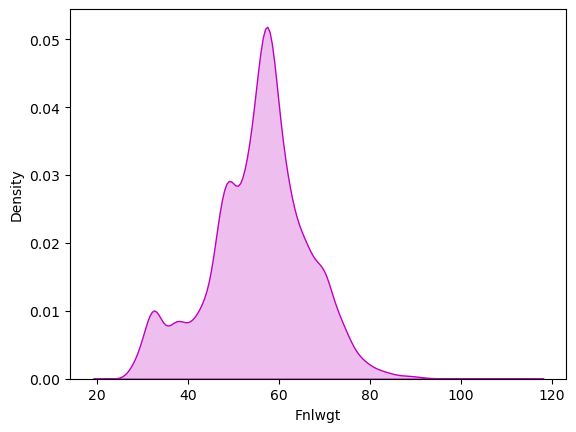

In [20]:
sns.distplot(df['Fnlwgt'], color='m',hist=False,kde_kws= {'shade':True})
plt.show()

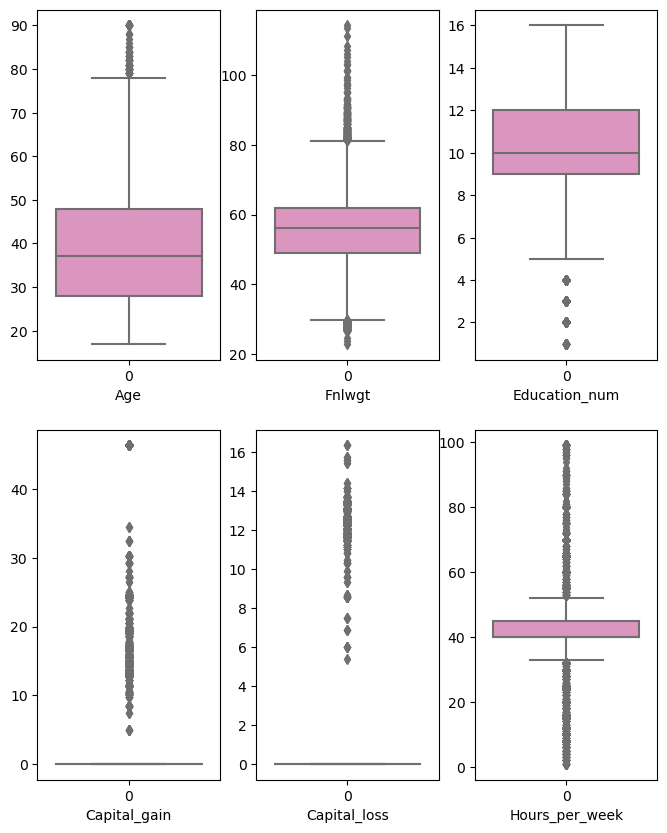

In [50]:
#letschecking outlier from boxplot method
plt.figure(figsize=(8,10))
p=1
for i in  numerical_col:
    if p<=6:
        plt.subplot(2,3,p)
        sns.boxplot(df[i], palette= 'Set2_r')
        plt.xlabel(i)
    p+=1
plt.show()

In [51]:
numerical_col

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

In [17]:
from scipy.stats import zscore

out_features = df[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']]
z= np.abs(zscore(out_features))
z

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,0.837097,1.087299,1.134779,0.278624,0.220559,2.222120
1,0.042640,0.417231,0.420027,0.278624,0.220559,0.035430
2,1.057031,0.575923,1.197429,0.278624,0.220559,0.035430
3,0.775755,1.314762,1.134779,0.278624,0.220559,0.035430
4,0.115952,0.953682,1.523480,0.278624,0.220559,0.035430
...,...,...,...,...,...,...
32555,0.849066,0.753034,0.746077,0.278624,0.220559,0.197407
32556,0.103982,0.166659,0.420027,0.278624,0.220559,0.035430
32557,1.423589,0.193158,0.420027,0.278624,0.220559,0.035430
32558,1.215624,0.293303,0.420027,0.278624,0.220559,1.655200


In [18]:
#threshold=3
np.where(z>3)

(array([    7,     9,    22, ..., 32530, 32537, 32559], dtype=int64),
 array([3, 5, 4, ..., 5, 3, 3], dtype=int64))

In [19]:
# now removing data above zscore and creating new dataframe
df1 = df[(z<3).all(axis=1)]
df1.shape

(29135, 14)

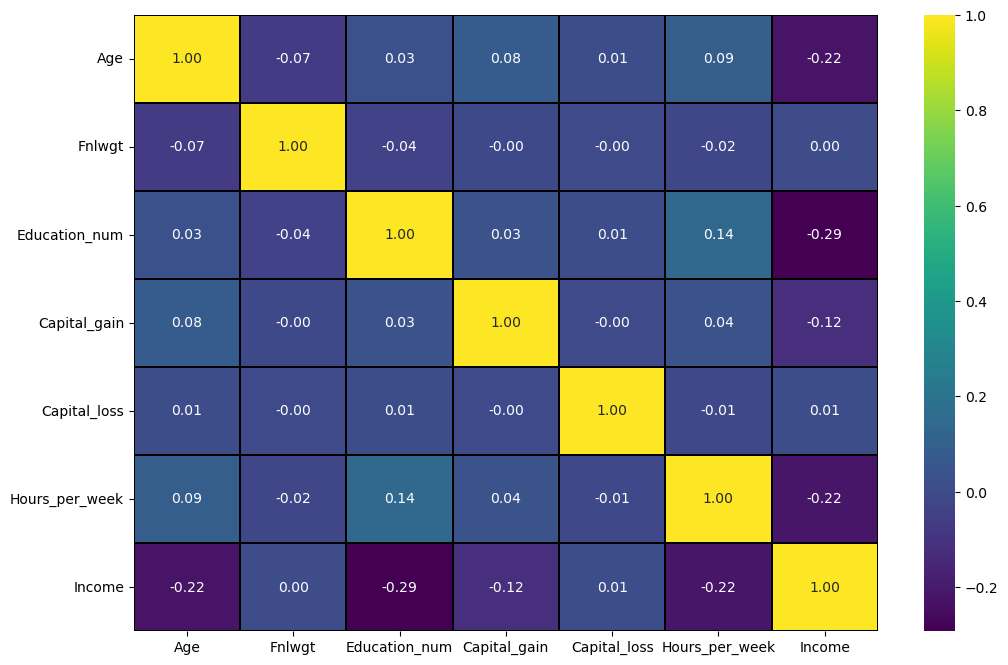

In [57]:
# thenwe checkthe coorelation between target and dependent variables
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(), linewidths = 0.2, fmt = '.2f', linecolor= 'black', annot = True, cmap = 'viridis')
plt.show()

we see thaat not much correlation to target variables  but both positive and negative correlation obtain between feature 
variablesand age,no of education hoursper week columns are more correlated with target  sothat we use all columns as features for understanding our modelfor prediction.

In [21]:
# there are lots of columns which isobject sothat we use encoding to encode them with labelencoder

from sklearn.preprocessing import LabelEncoder

In [23]:
for i in df1.columns:
    if df1[i].dtypes== 'object':
        encoder = LabelEncoder()
        df1[i] = encoder.fit_transform(df1[i])
df1        

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,6,43.675121,8,13,2,4,0,4,1,0.0,0.0,13,1
1,38,4,59.967204,10,9,0,6,1,4,1,0.0,0.0,40,1
2,53,4,61.685627,1,7,2,6,0,2,1,0.0,0.0,40,1
3,28,4,69.686283,8,13,2,10,5,2,0,0.0,0.0,40,1
4,37,4,65.776255,11,14,2,4,5,4,0,0.0,0.0,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,22,4,67.690054,13,10,4,11,1,4,1,0.0,0.0,40,1
32555,27,4,63.603506,6,12,2,13,5,4,0,0.0,0.0,38,1
32556,40,4,53.644440,10,9,2,7,0,4,1,0.0,0.0,40,0
32557,58,4,53.357498,10,9,6,1,4,4,0,0.0,0.0,40,1


In [25]:
# lets seperate the features and target variables
x = df1.drop('Income',axis=1)
y = df1['Income']

print(x.shape)
print(y.shape)

(29135, 13)
(29135,)


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x)
x.head()


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week
0,50,6,43.675121,8,13,2,4,0,4,1,0.0,0.0,13
1,38,4,59.967204,10,9,0,6,1,4,1,0.0,0.0,40
2,53,4,61.685627,1,7,2,6,0,2,1,0.0,0.0,40
3,28,4,69.686283,8,13,2,10,5,2,0,0.0,0.0,40
4,37,4,65.776255,11,14,2,4,5,4,0,0.0,0.0,40


In [28]:
# now initialize model building

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [29]:
maxaccu = 0
maxrs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state= i)
    lr= LogisticRegression()
    lr.fit(x_train,y_train)
    pred= lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu = acc
        maxrs = i
print('best accuracy is', maxaccu, 'at random state', maxrs)

best accuracy is 0.831598215307173 at random state 82


In [30]:
#creating train test split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state= maxrs)

In [31]:
rfc =  RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
print('accuracy_score :\n',accuracy_score(y_test,predrfc))
print('cofusion_matrix :\n',confusion_matrix(y_test,predrfc))
print('classification_report :\n',classification_report(y_test,predrfc))

accuracy_score :
 0.8469282690767647
cofusion_matrix :
 [[ 883  836]
 [ 502 6520]]
classification_report :
               precision    recall  f1-score   support

           0       0.64      0.51      0.57      1719
           1       0.89      0.93      0.91      7022

    accuracy                           0.85      8741
   macro avg       0.76      0.72      0.74      8741
weighted avg       0.84      0.85      0.84      8741



In [32]:
svc =  SVC()
svc.fit(x_train,y_train)
predsv = svc.predict(x_test)
print('accuracy_score :\n',accuracy_score(y_test,predsv))
print('cofusion_matrix :\n',confusion_matrix(y_test,predsv))
print('classification_report :\n',classification_report(y_test,predsv))

accuracy_score :
 0.8037981924264959
cofusion_matrix :
 [[   7 1712]
 [   3 7019]]
classification_report :
               precision    recall  f1-score   support

           0       0.70      0.00      0.01      1719
           1       0.80      1.00      0.89      7022

    accuracy                           0.80      8741
   macro avg       0.75      0.50      0.45      8741
weighted avg       0.78      0.80      0.72      8741



In [33]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddt = dtc.predict(x_test)
print('accuracy_score :\n',accuracy_score(y_test,preddt))
print('cofusion_matrix :\n',confusion_matrix(y_test,preddt))
print('classification_report :\n',classification_report(y_test,preddt))

accuracy_score :
 0.7957899553826794
cofusion_matrix :
 [[ 878  841]
 [ 944 6078]]
classification_report :
               precision    recall  f1-score   support

           0       0.48      0.51      0.50      1719
           1       0.88      0.87      0.87      7022

    accuracy                           0.80      8741
   macro avg       0.68      0.69      0.68      8741
weighted avg       0.80      0.80      0.80      8741



In [37]:
etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
predet = etc.predict(x_test)
print('accuracy_score :\n',accuracy_score(y_test,predet))
print('\n')
print('cofusion_matrix :\n',confusion_matrix(y_test,predet))
print('\n')
print('classification_report :\n',classification_report(y_test,predet))

accuracy_score :
 0.8399496625100102


cofusion_matrix :
 [[ 894  825]
 [ 574 6448]]


classification_report :
               precision    recall  f1-score   support

           0       0.61      0.52      0.56      1719
           1       0.89      0.92      0.90      7022

    accuracy                           0.84      8741
   macro avg       0.75      0.72      0.73      8741
weighted avg       0.83      0.84      0.84      8741



In [39]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predk = knn.predict(x_test)
print('accuracy_score :\n',accuracy_score(y_test,predk))
print('\n')
print('cofusion_matrix :\n',confusion_matrix(y_test,predk))
print('\n')
print('classification_report :\n',classification_report(y_test,predk))

accuracy_score :
 0.7972771994051024


cofusion_matrix :
 [[ 672 1047]
 [ 725 6297]]


classification_report :
               precision    recall  f1-score   support

           0       0.48      0.39      0.43      1719
           1       0.86      0.90      0.88      7022

    accuracy                           0.80      8741
   macro avg       0.67      0.64      0.65      8741
weighted avg       0.78      0.80      0.79      8741



In [40]:
#lets checking crooss validation across models

score= cross_val_score(etc,x,y,cv=5)
print(score)
print('mean :',score.mean())

[0.83542131 0.83679423 0.84159945 0.84177107 0.84022653]
mean : 0.8391625193066758


In [41]:
score= cross_val_score(dtc,x,y,cv=5)
print(score)
print('mean :',score.mean())

[0.79732281 0.80041188 0.80281448 0.80967908 0.79594989]
mean : 0.8012356272524455


In [42]:
score= cross_val_score(knn,x,y,cv=5)
print(score)
print('mean :',score.mean())

[0.80195641 0.80556032 0.80435902 0.80453063 0.8064184 ]
mean : 0.8045649562382013


In [43]:
score= cross_val_score(rfc,x,y,cv=5)
print(score)
print('mean :',score.mean())

[0.84039815 0.84280076 0.84897889 0.85344088 0.85275442]
mean : 0.847674618156856


In [44]:
score= cross_val_score(svc,x,y,cv=5)
print(score)
print('mean :',score.mean())

[0.80470225 0.80384417 0.80195641 0.80126995 0.80212802]
mean : 0.8027801613180024


In [45]:
score= cross_val_score(lr,x,y,cv=5)
print(score)
print('mean :',score.mean())

[0.81414107 0.82649734 0.82495281 0.81654368 0.8203192 ]
mean : 0.8204908186030548


we see that after cross validation check we have gain hiher accracy in randomforest model hence proceedwith this model and create hyperperameter tuning on this to achive more accracy

In [46]:
from sklearn .model_selection import GridSearchCV

In [49]:
params = {'n_estimators':[10,50,100], 'max_depth':[10,15,20],'min_samples_split': [8,5,10]}

In [50]:
search_cv= GridSearchCV(RandomForestClassifier(),params)
search_cv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 15, 20],
                         'min_samples_split': [8, 5, 10],
                         'n_estimators': [10, 50, 100]})

In [52]:
search_cv.best_params_

{'max_depth': 15, 'min_samples_split': 8, 'n_estimators': 100}

In [55]:
final_model = RandomForestClassifier(n_estimators=100,max_depth=20,min_samples_split=8)
final_model.fit(x_train,y_train)
pred_ = final_model.predict(x_test)
acc = accuracy_score(y_test,pred_)
print('accuracy to our final model :\n',acc)

accuracy to our final model :
 0.855851733211303


after hyper tuning the accuracy of our model accuracy increases therefore we hve finalize this model to prediction

In [56]:
# lets checking the roc auc graph for performance ofmodel
from sklearn import metrics
from sklearn.metrics import roc_auc_score

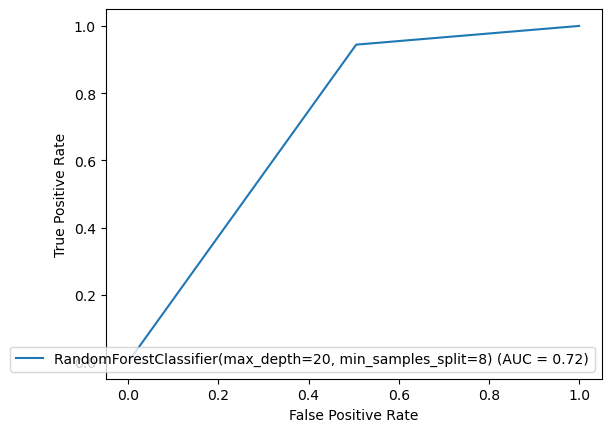

In [58]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_)
roc_auc= metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc= roc_auc, estimator_name= final_model)
display.plot()